# Bank Customer's Churn Classification

Classifying bank customers based on their previous banking activities, neither they will leave the bank or not.

Dataset: https://www.superdatascience.com/pages/deep-learning

In [1]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Importing libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datafiles/Churn_Modelling.csv')

## Exploring the Dataset

In [4]:
# Returns number of rows and columns of dataset
df.shape

(10000, 14)

In [5]:
# Returns the first 5 number of rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Returns the last 5 number of rows
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# Returns an object with all of the column headers 
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# Returns number of null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Importing essential libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


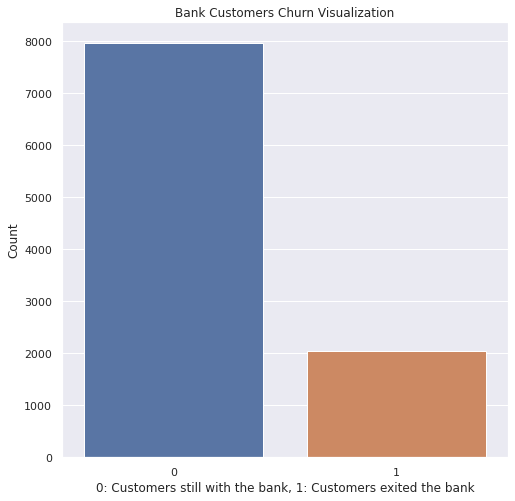

In [11]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

## Feature Engineering

In [12]:
dropped_columns=df.iloc[:,1:3]
dropped_columns

,CustomerId,Surname
0,15634602,Hargrave
1,15647311,Hill
2,15619304,Onio
3,15701354,Boni
4,15737888,Mitchell
...,...,...
9995,15606229,Obijiaku
9996,15569892,Johnstone
9997,15584532,Liu
9998,15682355,Sabbatini


In [13]:
#Dropping columns which are not needed
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [15]:
# Appending columns to original dataframe
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [16]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Data Preprocessing

In [18]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [19]:
# Splitting the dataset into the train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building Artificial Neural Network (ANN)

In [21]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [22]:
# Initialising the ANN
classifier = Sequential()

In [23]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [24]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [25]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [26]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6791 - accuracy: 0.6328 - val_loss: 0.5463 - val_accuracy: 0.7853
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4937 - accuracy: 0.7977 - val_loss: 0.4856 - val_accuracy: 0.7997
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4524 - accuracy: 0.8054 - val_loss: 0.4623 - val_accuracy: 0.8005
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4336 - accuracy: 0.8110 - val_loss: 0.4473 - val_accuracy: 0.8008
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4206 - accuracy: 0.8164 - val_loss: 0.4341 - val_accuracy: 0.7997
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4064 - accuracy: 0.8237 - val_loss: 0.4183 - val_accuracy: 0.8065
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3912 - accuracy: 0.8283 - val_loss: 0.4041 - val_accuracy: 0.8217

## Model Evaluation

In [28]:
# returns the propabilities to leave the bank
y_pred = classifier.predict(X_test) 
y_pred

array([[0.23492077],
       [0.27126336],
       [0.20682266],
       ...,
       [0.12714165],
       [0.09741712],
       [0.16843218]], dtype=float32)

In [29]:
y_pred = (y_pred > 0.5) # if y_pred >0.5 -> True, if not ->False
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [30]:
ff_1=pd.DataFrame(dropped_columns) 
ff_2=pd.DataFrame(y_pred) 
ff_1, ff_2

(      CustomerId    Surname
 0       15634602   Hargrave
 1       15647311       Hill
 2       15619304       Onio
 3       15701354       Boni
 4       15737888   Mitchell
 ...          ...        ...
 9995    15606229   Obijiaku
 9996    15569892  Johnstone
 9997    15584532        Liu
 9998    15682355  Sabbatini
 9999    15628319     Walker
 
 [10000 rows x 2 columns],           0
 0     False
 1     False
 2     False
 3     False
 4     False
 ...     ...
 1995  False
 1996  False
 1997  False
 1998  False
 1999  False
 
 [2000 rows x 1 columns])

In [31]:
Predictions=pd.concat([ff_1, ff_2], axis=1)
Predictions.columns=['CustomerId','Surname', 'Prediction']
Predictions

,CustomerId,Surname,Prediction
0,15634602,Hargrave,False
1,15647311,Hill,False
2,15619304,Onio,False
3,15701354,Boni,False
4,15737888,Mitchell,False
...,...,...,...
9995,15606229,Obijiaku,NaN
9996,15569892,Johnstone,NaN
9997,15584532,Liu,NaN
9998,15682355,Sabbatini,NaN


In [32]:
Predictions= Predictions[Predictions['Prediction'].notna()]
Predictions

,CustomerId,Surname,Prediction
0,15634602,Hargrave,False
1,15647311,Hill,False
2,15619304,Onio,False
3,15701354,Boni,False
4,15737888,Mitchell,False
...,...,...,...
1995,15617648,Mikkelsen,False
1996,15755678,Kovalyov,False
1997,15624781,Mbanefo,False
1998,15779497,Ts'ai,False


In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1525,   70],
       [ 204,  201]])

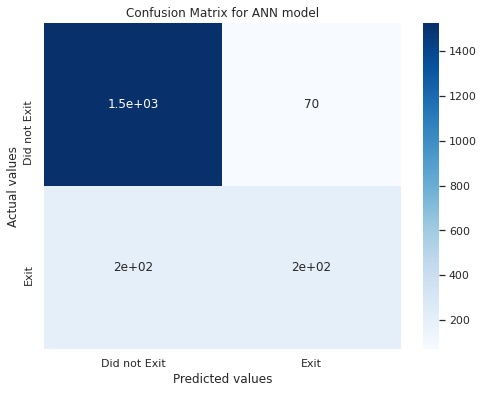

In [34]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [35]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 86.3%


In [36]:
# List all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

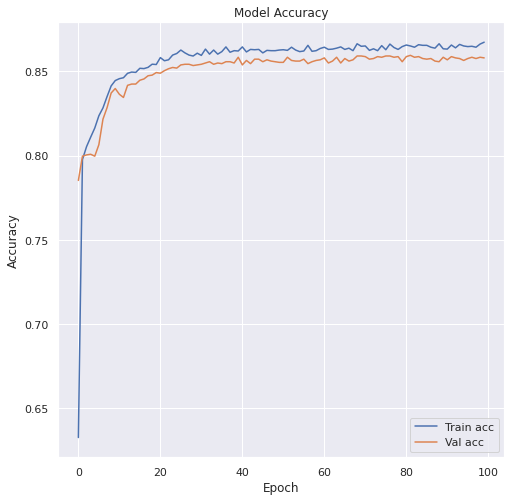

In [37]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Val acc'], loc='lower right')
plt.show()

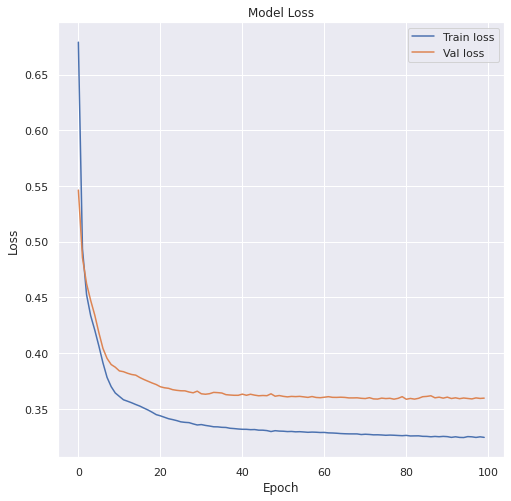

In [38]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper right')
plt.show()

## Predictions

In [40]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

### Prediction 1

In [41]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: Low change of exit.


### Prediction 2

In [42]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: High change of exit!
